Hi , Kevin Mastascusa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821118 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 no

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


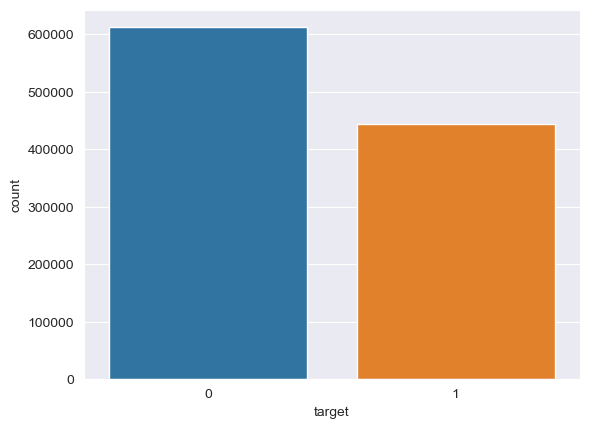

 ------------------------------------ 
 ------------------------------------ 
MARKER 2
 ------------------------------------ 
 ------------------------------------ 
Data Preprocessing:
NUMPY ARRAY CONVERSION:
Convert the dataframe to numpy array:
Print the numpy array:
[['Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia'
  0]
 ['Nitric oxide: a pro-inflammatory mediator in lung disease?' 0]
 ['Surfactant protein-D and pulmonary host defense' 0]
 ...
 ['A Patient With Bilateral Conjunctivitis Positive for SARS-CoV-2 RNA in a Conjunctival Sample'
  0]
 ['Incidental lowering of otitis-media complaints in otitis-prone children during COVID-19 pandemic: not all evil comes to hurt'
  1]
 ['Hospital variation in admissions to neonatal intensive care units by diagnosis severity and category'
  0]]
Print the shape of the numpy array:
(1056157, 2)
Print the type of the numpy array:
<class 'numpy.ndarray'>
Print the f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


TF-IDF Text Vectorizer:
Print the shape of the TF-IDF vectorizer:
(1000, 1000)
Print the type of the TF-IDF vectorizer:
<class 'scipy.sparse._csr.csr_matrix'>
Print the TF-IDF vectorizer:
  (0, 930)	0.5223048050592047
  (0, 712)	0.5223048050592047
  (0, 594)	0.2784427624281276
  (0, 296)	0.5890533744095889
  (0, 171)	0.17286159600154732
  (1, 952)	0.5508649598980113
  (1, 635)	0.45807987949302104
  (1, 619)	0.403133452753087
  (1, 361)	0.3279790983002038
  (1, 277)	0.4654285662803492
  (2, 871)	0.5123141812750858
  (2, 651)	0.5123141812750858
  (2, 540)	0.42030256009898087
  (2, 181)	0.5462729329768405
  (3, 969)	0.5636057620646413
  (3, 890)	0.4162984905672204
  (3, 608)	0.2641315453774545
  (3, 213)	0.503710918727204
  (3, 171)	0.1551122115774975
  (3, 9)	0.4018633482043871
  (4, 875)	0.23653488145235566
  (4, 608)	0.19675950372069342
  (4, 585)	0.31954999812067003
  (4, 543)	0.41984682245919913
  (4, 302)	0.38382469349276593
  :	:
  (996, 267)	0.43143487015386384
  (996, 206)	0.2283

'\nREAD ME\nmetadata.csv is the dataset that is used for this project.\nThe dataset is taken from the following link:\nhttps://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge\n\nThe dataset is a collection of research papers related to COVID-19, SARS-CoV-2, and related coronaviruses.\n\nThe dataset contains the following columns:\ncord_uid, sha, source_x, title, doi, pmcid, pubmed_id, license, abstract, publish_time, authors, journal,\nmag_id, who_covidence_id, arxiv_id, pdf_json_files, pmc_json_files, url, s2_id\n\n\n'

In [2]:
# PROGRAM HEADER NAME: KEVIN MASTASCUSA DESCRIPTION: This program is a data science project that uses the CORD-19
# dataset to perform sentiment analysis on the abstracts of the papers. The program will use the abstracts to
# determine if the paper is about COVID-19 or not. DATE: VERSION: 1.0 USAGE: python main.py
# ================================================================================================================

import string  # To remove any punctuations
import matplotlib.pyplot as plt  # For data visualization
import numpy as np
# Import the required libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  # To perform lemmatization
from nltk.stem.porter import PorterStemmer  # To perform stemming
from nltk.tokenize import word_tokenize  # To create tokens from text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, \
    classification_report, precision_recall_fscore_support, \
    mean_squared_error, mean_absolute_error, r2_score, \
    explained_variance_score  # To measure how well the model is performing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
# import decision tree
from sklearn.tree import DecisionTreeClassifier
# import random forest
from sklearn.ensemble import RandomForestClassifier


# nltk.download('punkt')  # punkt is a pre-trained model that helps you tokenize words and sentences
# nltk.download('wordnet')  # wordnet is a lexical database for the English language
# nltk.download('stopwords')  # stopwords are the words in any language which does not add much meaning to a sentence


# warnings.filterwarnings('ignore')
# To ignore any warnings
# stops = set(stopwords.words('english'))
# To remove the stopwords
# print(stops)
# To print the stopwords


# nltk.download()


def print_hi(name):
    """
    This function prints the name of the user



    :param name:
    """
    print(f'Hi , {name}')


def main():
    print(f'Welcome to the CORD-19 Sentiment Analysis Project')
    print(f'Please select an option from the menu below')
    print(f'1. Perform Sentiment Analysis on the CORD-19 Dataset')
    print(f'2. Exit')
    choice = int(input(f'Enter your choice: '))
    if choice == 1:
        print(f'Performing Sentiment Analysis on the CORD-19 Dataset')
        print(f'Please wait while the program loads the dataset')
    if choice == 2:
        print(f'Exiting the program')
        exit()
    else:
        print(f'Invalid choice. Please try again')
        main()


def clean_text(text):
    """
    This function performs the following operations:
    1. Removes the punctuations
    2. Removes the stopwords
    3. Performs stemming
    4. Performs lemmatization

    :param text:
    :return:

    Example:
    Input: "This is a sample text!!!"

    Output: "sample text"
    """
    # Remove the punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert the text to lowercase
    text = text.lower()
    # Create tokens from the text
    tokens = word_tokenize(text)
    # Remove the stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens to form the text
    text = ' '.join(tokens)
    return text


# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    """
    Function to plot the confusion matrix


    :param y_test:
    :param y_pred:
    :return:
    """

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()


# KNN
# Function to train the KNN model
def train_knn(X_train, y_train, k):
    """
    Function to train the KNN model

    :param X_train:
    :param y_train:
    :param k:
    :return:
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn


# Function to test the KNN model
def test_knn(knn, X_test):
    """
    Function to test the KNN model

    :param knn:
    :param X_test:
    :return:
    """
    y_pred = knn.predict(X_test)
    return y_pred


# Function to perform KNN classification
def knn_classification(X_train, y_train, X_test, y_test, k):
    """
    Function to perform KNN classification

    :param X_train:

    :param y_train:
    :param X_test:
    :param y_test:
    :param k:
    :return:
    """
    knn = train_knn(X_train, y_train, k)
    y_pred = test_knn(knn, X_test)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)


# Naive Bayes
# Function to train the Naive Bayes model
def train_naive_bayes(X_train, y_train):
    """
    Function to train the Naive Bayes model
  :param X_train:
    :param y_train:
    :return:
    """
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    return nb


# Function to test the Naive Bayes model
def test_naive_bayes(nb, X_test):
    """
    Function to test the Naive Bayes model

    :param nb:
    :param X_test:
    :return:
    """
    y_pred = nb.predict(X_test)
    return y_pred


# Create Class Attribute For Target Variable
def create_class_attribute(df):
    """
    Create Class Attribute For Target Variable


    :param df:
    :return:
    """

    df['class'] = df['Sentiment'].apply(lambda x: 1 if x == 'covid-19' else 0)
    return df


# Create Sentiment Description Attribute For Target Variable
def create_sentiment_description_attribute(df):
    """
    Create Sentiment Description Attribute For Target Variable

    :param df:
    :return:
    """
    df['Sentiment_Description'] = df['Sentiment'].apply(lambda x: 'Positive' if x == 'covid-19' else 'Negative')
    return df


# CREATE DOMAIN ATTRIBUTE FOR TARGET VARIABLE
def create_domain_attribute(df):
    """
    CREATE DOMAIN ATTRIBUTE FOR TARGET VARIABLE

    :param df:
    :return:
    """

    df['Domain'] = df['Sentiment'].apply(lambda x: 'COVID-19' if x == 'covid-19' else 'Other')
    return df


# Function to Preprocess the data
def preprocess_data(df):
    # Remove the rows with missing values
    df.dropna(inplace=True)
    # Remove the duplicates
    df.drop_duplicates(inplace=True)
    # Remove the rows with the class label as 'other'
    df = df[df['Sentiment'] != 'other']
    # Clean the text
    df['cleaned_text'] = df['Abstract'].apply(clean_text)
    return df


if __name__ == "__main__":
    print_hi('Kevin Mastascusa')
    # Load the data
    df = pd.read_csv('metadata.csv', low_memory=False)
    # Print the structure of the data
    print(df.info())
    # Print the first 10 rows of the data
    print(df.head(10))
    # Print a summary of the data
    print(df.describe(include='all'))
    # Print the number of missing values in each column
    print(df.isnull().sum())
    # Print the number of unique values in each column
    print(df.nunique())

print('=' * 500)
print('Data Preprocessing')
print('=' * 500)
# Preprocess the data
print('Drop the columns that are not required:')
df.drop(['cord_uid', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors',
         'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id'],
        axis=1, inplace=True)
# Check the structure of the data
print('Check the structure of the data:')
print(df.info())
# Print the first 10 rows of the data
print('Print the first 10 rows of the data:')
print(df.head(10))
# Print a summary of the data
print('Print a summary of the data:')
print(df.describe(include='all'))
# Print the number of missing values in each column
print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())
# Drop the rows with missing values
print('Drop the rows with missing values:')
df.dropna(inplace=True)
# Print the number of missing values in each column
print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())

print("MARKER 1")
print(' ------------------------------------ ')
print(' ------------------------------------ ')
# Add target column for classification.
print('Add target column for classification:')
df['target'] = df['title'].apply(lambda x: 1 if 'covid-19' in x.lower() else 0)
# add target
# Print the first 10 rows of the data
print('Print the first 10 rows of the data:')
print(df.head(10))
# Print the number of missing values in each column
print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())
# Print the class distribution
print('Class distribution:')
print(df['target'].value_counts())
# Plot the class distribution
print('Class distribution plot:')
sns.countplot(df['target'])
plt.show()
print(' ------------------------------------ ')
print(' ------------------------------------ ')

print("MARKER 2")
print(' ------------------------------------ ')
print(' ------------------------------------ ')

print('Data Preprocessing:')
print('NUMPY ARRAY CONVERSION:')
print('Convert the dataframe to numpy array:')
numpy_array = df.to_numpy()
print('Print the numpy array:')
print(numpy_array)
print('Print the shape of the numpy array:')
print(numpy_array.shape)
print('Print the type of the numpy array:')
print(type(numpy_array))

print('Print the first row of the numpy array:')
print(numpy_array[0])
print('Print the second row of the numpy array:')
print(numpy_array[1])
print('Print the third row of the numpy array:')
print(numpy_array[2])
print('Print the fourth row of the numpy array:')
print(numpy_array[3])
print('Print the fifth row of the numpy array:')
print(numpy_array[4])

print('Print the first column of the numpy array:')
print(numpy_array[:, 0])
print('Print the second column of the numpy array:')
print(numpy_array[:, 1])

print('Print the first row and first column of the numpy array:')
print(numpy_array[0][0])

print('Print the first row and second column of the numpy array:')
print(numpy_array[0][1])

# Export as csv file
print('Export as csv file:')
df.to_csv('CORD19_abstract.csv', index=False)
var = open('CORD19_abstract.csv', 'r', encoding='utf-8').readlines()[:5]
print(var)

print(' ------------------------------------ ')
print(' ------------------------------------ ')

print('text cleaning:')
# Convert to lower case
print('Convert to lower case:')
df['title'] = df['title'].apply(lambda x: x.lower())
# Remove punctuation
print('Remove punctuation:')
df['title'] = df['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Remove numbers
print('Remove numbers:')
df['title'] = df['title'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))
# Remove whitespaces
print('Remove whitespaces:')
df['title'] = df['title'].apply(lambda x: x.strip())
# Remove stopwords
print('Remove stopwords:')
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# Remove short words
print('Remove short words:')
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))
# Lemmatization
print('Lemmatization:')
lemmatizer = WordNetLemmatizer()
df['title'] = df['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# Print the first 5 rows of the data
print('Print the first 5 rows of the data:')
print(df.head())
# Print the number of missing values in each column

print('Number of missing values in each column:')
print(df.isnull().sum())
# Print the number of unique values in each column
print('Number of unique values in each column:')
print(df.nunique())

save_path = 'CORD19_abstract_cleaned.csv'
df.to_csv(save_path, index=False)
var = open(save_path, 'r', encoding='utf-8').readlines()[:5]
print(var)

print(' ------------------------------------ ')

# TF
print('TF Text Vectorizer:')
tf_binary_vectorizer = CountVectorizer(binary=True,
                                       max_features=1000)  # max_features=1000 to limit the number of features (vocabulary) to 1000
# binary=True to get binary outputs (0 or 1) instead of counts (1, 2, 3, etc.)
# Fit the vectorizer
tf_binary_vectorizer.fit(df['title'])
X = tf_binary_vectorizer.transform(df['title'])
print('Print the shape of the TF Binary vectorizer:')
print(X.shape)
print('Print the type of the TF Binary vectorizer:')
print(type(X))
print('Print the TF Binary vectorizer:')
print(X)
print('Print the TF Binary vectorizer to array:')
print(X.toarray())
print('Print the TF Binary vectorizer to array shape:')
print(X.toarray().shape)
print('Print the TF Binary vectorizer to array type:')
print(type(X.toarray()))
print('Print the TF Binary vectorizer to array first row:')
print(X.toarray()[0])
print('Print the TF Binary vectorizer to array first row shape:')
print(X.toarray()[0].shape)
print('Print the TF Binary vectorizer to array first row type:')
print(type(X.toarray()[0]))

# TF-IDF
print(
    'TF-IDF Text Vectorizer:')  # TF-IDF is a combination of TF and IDF (Inverse Document Frequency) which is a measure of how important a word is in a document
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000)  # max_features=1000 to limit the number of features (vocabulary) to 1000
# Fit the vectorizer
tfidf_vectorizer.fit(
    df['title'])  # The vectorizer learns the vocabulary from the data and assigns an index to each word
X = tfidf_vectorizer.transform(df['title'])  # The vectorizer contains the TF-IDF values for each word in each document
print('Print the shape of the TF-IDF vectorizer:')  # The shape is (number of documents, number of features)
print(X.shape)
print('Print the type of the TF-IDF vectorizer:')  # The type is sparse matrix
print(type(X))
print('Print the TF-IDF vectorizer:')  # The vectorizer contains the TF-IDF values for each word in each document
print(X)
print('Print the TF-IDF vectorizer to array:')  # The array contains the TF-IDF values for each word in each document
print(X.toarray())
print('Print the TF-IDF vectorizer to array shape:')  # The shape is (number of documents, number of features)
print(X.toarray().shape)
print('Print the TF-IDF vectorizer to array type:')  # The type is numpy array
print(type(X.toarray()))
print('Print the TF-IDF vectorizer to array first row:')  # The first row is the first document
print(X.toarray()[0])
print('Print the TF-IDF vectorizer to array first row shape:')  # The shape is (number of features,)
print(X.toarray()[0].shape)

print(' ------------------------------------ ')
print(' ------------------------------------ ')
print(' ------------------------------------ ')

# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)
print('Print the shape of the training set:')
print(X_train.shape)
print('Print the shape of the testing set:')
print(X_test.shape)
print('Print the shape of the training labels:')
print(y_train.shape)
print('Print the shape of the testing labels:')
print(y_test.shape)

# Train the model
print('Train the model:')
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the labels
print('Predict the labels:')
y_pred_binary = model.predict(X_test)
print('Print the predicted labels:')
print(y_pred_binary)

# Evaluate the model
print('Evaluate the model:')
print('Accuracy:')
print(accuracy_score(y_test,
                     y_pred_binary))  # Accuracy is the ratio of correctly predicted observations to the total
# observations
print(
    'Precision, Recall, F1-Score:')  # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
print(precision_recall_fscore_support(y_test, y_pred_binary,
                                      average='macro'))  # average='macro' to get the average of the precision, recall, and F1-score of the two classes
print('Confusion Matrix:')  #
print(confusion_matrix(y_test, y_pred_binary))

print(' ------------------------------------ ')

# KNN Classifier

print('KNN Classifier:')
print('=' * 50)
# Take a small sample of the data
print('Take a small sample of the data:')
df_sample = df.sample(n=1000, random_state=42)
print('Print the shape of the sample:')
print(df_sample.shape)

# TF-IDF
print(
    'TF-IDF Text Vectorizer:')  # TF-IDF is a combination of TF and IDF (Inverse Document Frequency) which is a measure of how important a word is in a document
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000)  # max_features=1000 to limit the number of features (vocabulary) to 1000
# Fit the vectorizer
tfidf_vectorizer.fit(
    df_sample['title'])  # The vectorizer learns the vocabulary from the data and assigns an index to each word
X = tfidf_vectorizer.transform(
    df_sample['title'])  # The vectorizer contains the TF-IDF values for each word in each document
print('Print the shape of the TF-IDF vectorizer:')  # The shape is (number of documents, number of features)
print(X.shape)
print('Print the type of the TF-IDF vectorizer:')  # The type is sparse matrix
print(type(X))
print('Print the TF-IDF vectorizer:')  # The vectorizer contains the TF-IDF values for each word in each document
print(X)
print('Print the TF-IDF vectorizer to array:')  # The array contains the TF-IDF values for each word in each document
print(X.toarray())
print('Print the TF-IDF vectorizer to array shape:')  # The shape is (number of documents, number of features)
print(X.toarray().shape)
print('Print the TF-IDF vectorizer to array type:')  # The type is numpy array
print(type(X.toarray()))
print('Print the TF-IDF vectorizer to array first row:')  # The first row is the first document
print(X.toarray()[0])
print('Print the TF-IDF vectorizer to array first row shape:')  # The shape is (number of features,)
print(X.toarray()[0].shape)

print(' ------------------------------------ ')

# Split the data into training and testing sets
print('Split the data into training and testing sets:')

X_train, X_test, y_train, y_test = train_test_split(X, df_sample['target'], test_size=0.2, random_state=42)
print('Print the shape of the training set:')
print(X_train.shape)
print('Print the shape of the testing set:')
print(X_test.shape)
print('Print the shape of the training labels:')
print(y_train.shape)
print('Print the shape of the testing labels:')
print(y_test.shape)

# Train the model
print('Train the model:')
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict the labels
print('Predict the labels:')
y_pred_binary = model.predict(X_test)
print('Print the predicted labels:')
print(y_pred_binary)

# Evaluate the model
print('Evaluate the model:')
print('Accuracy:')
print(accuracy_score(y_test,
                     y_pred_binary))  # Accuracy is the ratio of correctly predicted observations to the total observations
print(
    'Precision, Recall, F1-Score:')  # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
print(precision_recall_fscore_support(y_test, y_pred_binary,
                                      average='macro'))  # average='macro' to get the average of the precision, recall, and F1-score of the two classes
print('Confusion Matrix:')  #
print(confusion_matrix(y_test, y_pred_binary))
print('classification_report:')
print(classification_report(y_test, y_pred_binary))
print('mean_squared_error:')
print(mean_squared_error(y_test, y_pred_binary))
print('mean_absolute_error:')
print(mean_absolute_error(y_test, y_pred_binary))
print('r2_score:')
print(r2_score(y_test, y_pred_binary))
print('explained_variance_score:')
print(explained_variance_score(y_test, y_pred_binary))

# Save classification report to csv file
print('Save classification report to csv file:')
report = classification_report(y_test, y_pred_binary, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('classification_reportKNNClassifier5N.csv', index=False)

# Save confusion matrix to csv file
print('Save confusion matrix to csv file:')
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_binary))
df_confusion_matrix.to_csv('confusion_matrixKNNClassifier5N.csv', index=False)

print(' ------------------------------------ ')

# Naive Bayes Classifier

print('Naive Bayes Classifier:')
print('=' * 50)
# Take a small sample of the data
print('Take a small sample of the data:')
df_sample = df.sample(n=1000, random_state=42)
print('Print the shape of the sample:')
print(df_sample.shape)

# TF-IDF
print(
    'TF-IDF Text Vectorizer:')  # TF-IDF is a combination of TF and IDF (Inverse Document Frequency) which is a measure of how important a word is in a document
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000)  # max_features=1000 to limit the number of features (vocabulary) to 1000
# Fit the vectorizer
tfidf_vectorizer.fit(
    df_sample['title'])  # The vectorizer learns the vocabulary from the data and assigns an index to each word
X = tfidf_vectorizer.transform(
    df_sample['title'])  # The vectorizer contains the TF-IDF values for each word in each document
print('Print the shape of the TF-IDF vectorizer:')  # The shape is (number of documents, number of features)
print(X.shape)
print('Print the type of the TF-IDF vectorizer:')  # The type is sparse matrix
print(type(X))
print('Print the TF-IDF vectorizer:')  # The vectorizer contains the TF-IDF values for each word in each document
print(X)

# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, df_sample['target'], test_size=0.2, random_state=42)
print('Print the shape of the training set:')
print(X_train.shape)
print('Print the shape of the testing set:')
print(X_test.shape)
print('Print the shape of the training labels:')
print(y_train.shape)
print('Print the shape of the testing labels:')
print(y_test.shape)

# Train the model
print('Train the model:')
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the labels
print('Predict the labels:')
y_pred_binary = model.predict(X_test)
print('Print the predicted labels:')
print(y_pred_binary)

# Evaluate the model
print('Evaluate the model:')
print('Accuracy:')
print(accuracy_score(y_test,
                     y_pred_binary))  # Accuracy is the ratio of correctly predicted observations to the total observations

print(
    'Precision, Recall, F1-Score:')  # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
print(precision_recall_fscore_support(y_test, y_pred_binary,
                                      average='macro'))  # average='macro' to get the average of the precision, recall, and F1-score of the two classes

print('Confusion Matrix:')  #
print(confusion_matrix(y_test, y_pred_binary))
print('classification_report:')

print(classification_report(y_test, y_pred_binary))
print('mean_squared_error:')
print(mean_squared_error(y_test, y_pred_binary))
print('mean_absolute_error:')
print(mean_absolute_error(y_test, y_pred_binary))
print('r2_score:')
print(r2_score(y_test, y_pred_binary))
print('explained_variance_score:')
print(explained_variance_score(y_test, y_pred_binary))
print(' ------------------------------------ ')

# Save classification report to csv file
print('Save classification report to csv file:')
report = classification_report(y_test, y_pred_binary, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('classification_reportNaiveBayesClassifier.csv', index=False)

# Save confusion matrix to csv file
print('Save confusion matrix to csv file:')
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_binary))
df_confusion_matrix.to_csv('confusion_matrixNaiveBayesClassifier.csv', index=False)

# Decision Tree Classifier

print('Decision Tree Classifier:')
print('=' * 50)
# Take a small sample of the data
print('Take a small sample of the data:')
df_sample = df.sample(n=1000, random_state=42)

# TF-IDF
print(
    'TF-IDF Text Vectorizer:')  # TF-IDF is a combination of TF and IDF (Inverse Document Frequency) which is a measure of how important a word is in a document
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000)  # max_features=1000 to limit the number of features (vocabulary) to 1000
# Fit the vectorizer
tfidf_vectorizer.fit(
    df_sample['title'])  # The vectorizer learns the vocabulary from the data and assigns an index to each word
X = tfidf_vectorizer.transform(
    df_sample['title'])  # The vectorizer contains the TF-IDF values for each word in each document
print('Print the shape of the TF-IDF vectorizer:')  # The shape is (number of documents, number of features)
print(X.shape)
print('Print the type of the TF-IDF vectorizer:')  # The type is sparse matrix
print(type(X))
print('Print the TF-IDF vectorizer:')  # The vectorizer contains the TF-IDF values for each word in each document
print(X)

# Split the data into training and testing sets
print('Split the data into training and testing sets:')

X_train, X_test, y_train, y_test = train_test_split(X, df_sample['target'], test_size=0.2, random_state=42)
print('Print the shape of the training set:')
print(X_train.shape)

print('Print the shape of the testing set:')
print(X_test.shape)

print('Print the shape of the training labels:')
print(y_train.shape)

print('Print the shape of the testing labels:')
print(y_test.shape)

# Train the model
print('Train the model:')
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the labels
print('Predict the labels:')

y_pred_binary = model.predict(X_test)
print('Print the predicted labels:')
print(y_pred_binary)

# Evaluate the model
print('Evaluate the model:')
print('Accuracy:')
print(accuracy_score(y_test,
                     y_pred_binary))  # Accuracy is the ratio of correctly predicted observations to the total observations

print(
    'Precision, Recall, F1-Score:')  # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
print(precision_recall_fscore_support(y_test, y_pred_binary,
                                      average='macro'))  # average='macro' to get the average of the precision, recall, and F1-score of the two classes

print('Confusion Matrix:')  #
print(confusion_matrix(y_test, y_pred_binary))
print('classification_report:')
print(classification_report(y_test, y_pred_binary))
print('mean_squared_error:')
print(mean_squared_error(y_test, y_pred_binary))
print('mean_absolute_error:')
print(mean_absolute_error(y_test, y_pred_binary))
print('r2_score:')
print(r2_score(y_test, y_pred_binary))
print('explained_variance_score:')
print(explained_variance_score(y_test, y_pred_binary))

# Save classification report to csv file
print('Save classification report to csv file:')
report = classification_report(y_test, y_pred_binary, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('classification_reportDecisionTreeClassifier.csv', index=False)

# Save confusion matrix to csv file
print('Save confusion matrix to csv file:')
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_binary))
df_confusion_matrix.to_csv('confusion_matrixDecisionTreeClassifier.csv', index=False)
print(' ------------------------------------ ')

print(' ------------------------------------ ')

# Random Forest Classifier

print('Random Forest Classifier:')
print('=' * 50)
# Take a small sample of the data
print('Take a small sample of the data:')
df_sample = df.sample(n=1000, random_state=42)

# TF-IDF
print(
    'TF-IDF Text Vectorizer:')  # TF-IDF is a combination of TF and IDF (Inverse Document Frequency) which is a measure of how important a word is in a document
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000)  # max_features=1000 to limit the number of features (vocabulary) to 1000
# Fit the vectorizer
tfidf_vectorizer.fit(
    df_sample['title'])  # The vectorizer learns the vocabulary from the data and assigns an index to each word
X = tfidf_vectorizer.transform(
    df_sample['title'])  # The vectorizer contains the TF-IDF values for each word in each document
print('Print the shape of the TF-IDF vectorizer:')  # The shape is (number of documents, number of features)
print(X.shape)
print('Print the type of the TF-IDF vectorizer:')  # The type is sparse matrix
print(type(X))
print('Print the TF-IDF vectorizer:')  # The vectorizer contains the TF-IDF values for each word in each document
print(X)

# Split the data into training and testing sets
print('Split the data into training and testing sets:')
X_train, X_test, y_train, y_test = train_test_split(X, df_sample['target'], test_size=0.2, random_state=42)
print('Print the shape of the training set:')
print(X_train.shape)

print('Print the shape of the testing set:')
print(X_test.shape)

print('Print the shape of the training labels:')
print(y_train.shape)

print('Print the shape of the testing labels:')
print(y_test.shape)

# Train the model
print('Train the model:')
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels
print('Predict the labels:')
y_pred_binary = model.predict(X_test)
print('Print the predicted labels:')
print(y_pred_binary)

# Evaluate the model
print('Evaluate the model:')

print('Accuracy:')
print(accuracy_score(y_test,
                     y_pred_binary))  # Accuracy is the ratio of correctly predicted observations to the total observations

print(
    'Precision, Recall, F1-Score:')  # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
print(precision_recall_fscore_support(y_test, y_pred_binary,
                                      average='macro'))  # average='macro' to get the average of the precision, recall, and F1-score of the two classes

print('Confusion Matrix:')  #
print(confusion_matrix(y_test, y_pred_binary))
print('classification_report:')
print(classification_report(y_test, y_pred_binary))
print('mean_squared_error:')
print(mean_squared_error(y_test, y_pred_binary))
print('mean_absolute_error:')
print(mean_absolute_error(y_test, y_pred_binary))
print('r2_score:')
print(r2_score(y_test, y_pred_binary))
print('explained_variance_score:')
print(explained_variance_score(y_test, y_pred_binary))

# Save classification report to csv file
print('Save classification report to csv file:')
report = classification_report(y_test, y_pred_binary, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('classification_report.csv', index=False)

# Save confusion matrix to csv file
print('Save confusion matrix to csv file:')
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_binary))
df_confusion_matrix.to_csv('confusion_matrix.csv', index=False)

print(' ------------------------------------ ')

print(' ------------------------------------ ')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # return the compound score


print(' ------------------------------------ ')

print(' ------------------------------------ ')

# Load cleaned dataset
print('Load cleaned dataset:')
df = pd.read_csv('CORD19_abstract_cleaned.csv')

# print the first 5 rows of the dataframe
print('Print the first 5 rows of the dataframe:')
print(df.head())

# add a new column to the dataframe
print('Add a new column to the dataframe:')
df['title'] = df['title'].fillna('')
df['sentiment'] = df['title'].apply(get_sentiment)

# print the first 5 rows of the dataframe
print('Print the first 5 rows of the dataframe:')
print(df.head())

# save the dataframe to csv file
print('Save the dataframe to csv file:')
df.to_csv('sentiments.csv', index=False)

print(' ------------------------------------ ')

print(' ------------------------------------ ')

import numpy as np

# Load sentiments dataset
print('Load sentiments dataset:')
df = pd.read_csv('sentiments.csv')

# Sentiment Analysis
print('Sentiment Analysis:')
print('=' * 50)

# Take a small sample of the data
print('Take a small sample of the data:')
df_sample = df.sample(n=1000, random_state=42)

# TF
print('TF Text Vectorizer:')
tf_vectorizer = CountVectorizer(max_features=1000)
tf_vectorizer.fit(df_sample['title'])
X_text = tf_vectorizer.transform(df_sample['title'])

# Include the sentiment scores
print('Including the sentiment scores:')
X_sentiment = df_sample['sentiment'].values.reshape(-1, 1)
X = np.concatenate((X_text.toarray(), X_sentiment), axis=1)

# Prepare data for sentiment analysis
print('Prepare data for sentiment analysis:')
X_train, X_test, y_train, y_test = train_test_split(X, df_sample['target'], test_size=0.2, random_state=42)

# Train the model
print('Train the model:')
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels
print('Predict the labels:')
y_pred_binary = model.predict(X_test)
print('Print the predicted labels:')
print(y_pred_binary)

# Evaluate the model
print('Evaluate the model:')
print('Accuracy:')
print(accuracy_score(y_test, y_pred_binary))
print('Precision, Recall, F1-Score:')
print(precision_recall_fscore_support(y_test, y_pred_binary, average='macro'))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_binary))
print('Classification Report:')
print(classification_report(y_test, y_pred_binary))
print('Mean Squared Error:')
print(mean_squared_error(y_test, y_pred_binary))
print('Mean Absolute Error:')
print(mean_absolute_error(y_test, y_pred_binary))
print('R2 Score:')
print(r2_score(y_test, y_pred_binary))
print('Explained Variance Score:')
print(explained_variance_score(y_test, y_pred_binary))

# Save classification report to csv file
print('Save classification report to csv file:')
report = classification_report(y_test, y_pred_binary, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('classification_reportSent.csv', index=False)

# Save confusion matrix to csv file
print('Save confusion matrix to csv file:')
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_binary))
df_confusion_matrix.to_csv('confusion_matrixSent.csv', index=False)

print(' ------------------------------------ ')

'''
READ ME
metadata.csv is the dataset that is used for this project.
The dataset is taken from the following link:
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

The dataset is a collection of research papers related to COVID-19, SARS-CoV-2, and related coronaviruses.

The dataset contains the following columns:
cord_uid, sha, source_x, title, doi, pmcid, pubmed_id, license, abstract, publish_time, authors, journal,
mag_id, who_covidence_id, arxiv_id, pdf_json_files, pmc_json_files, url, s2_id


'''
